# Some initial results on Ising Spin Models

This notebook explores some interesting results of Ising spin models ran on simple 2D non-periodic latices, and on a small-world network generated using rules described in the Barabasi-Alberts model.

In [37]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

import analysis.Stats as Stats

stats = Stats.Stats()

allTemperatures = [float(x)/10 for x in range(1, 50)]
numIsingSpins = 100 * 100
numSWSpins = 10000
cols = ['energy', 'sqEnergy', 'mag', 'sqMag']

def normalizeNetwork(x):
    return x / float(10000)

def normalizeIsing(x):
    return x / float(100*100)

def addOne(x):
    return x + 1

ising = pd.read_csv('./data/ising.random.periodic.100.4.2.csv', header=None)
isingAfterCritical = pd.read_csv('./data/ising.random.periodic.100.1.8.csv', header=None)

smallWorld1 = pd.read_csv('./data/small-world.random.10000.4.3.csv', header=None)
smallWorld2 = pd.read_csv('./data/small-world.random.10000.3.9.csv', header=None)
smallWorld3 = pd.read_csv('./data/small-world.random.10000.3.3.csv', header=None)

periodicCV = pd.read_csv('./data/p.specificheat.csv', header=None)
swCV = pd.read_csv('./data/sw.specificheat.csv', header=None)

ising.columns = cols
isingAfterCritical.columns = cols
smallWorld1.columns = cols
smallWorld2.columns = cols
smallWorld3.columns = cols

## The Ising Model away from the critical point

In [30]:
isingEnergy = ising['energy'].map(normalizeIsing)

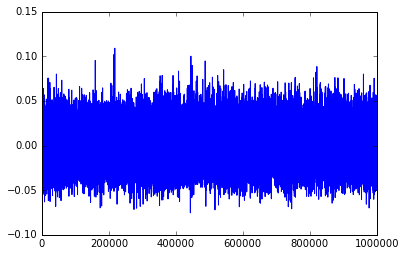

In [31]:
plt.plot(stats.computeLogReturns(ising['energy'][:-1], ising['energy'][1:]))

Let's also take a look at the histogram of energy. We can see it's quite "normal".

(array([  1.45000000e+02,   4.58200000e+03,   2.51770000e+04,
          1.10250000e+05,   2.36570000e+05,   3.25831000e+05,
          2.16705000e+05,   6.84490000e+04,   1.15270000e+04,
          7.64000000e+02]),
 array([-0.1944 , -0.18432, -0.17424, -0.16416, -0.15408, -0.144  ,
        -0.13392, -0.12384, -0.11376, -0.10368, -0.0936 ]),
 <a list of 10 Patch objects>)

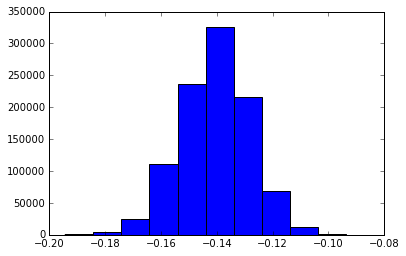

In [32]:
plt.hist(isingEnergy)

## The Ising model near the critical point

In [33]:
isingAfterCriticalEnergy = isingAfterCritical['energy'].map(normalizeIsing)

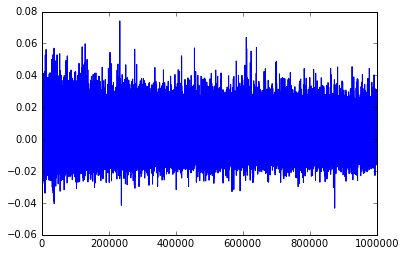

In [34]:
plt.plot(stats.computeLogReturns(isingAfterCriticalEnergy[:-1], isingAfterCriticalEnergy[1:]))

(array([   2538.,   82834.,  299642.,  275096.,  153371.,   64629.,
          57410.,   40071.,   21346.,    3063.]),
 array([-1.3984 , -1.34104, -1.28368, -1.22632, -1.16896, -1.1116 ,
        -1.05424, -0.99688, -0.93952, -0.88216, -0.8248 ]),
 <a list of 10 Patch objects>)

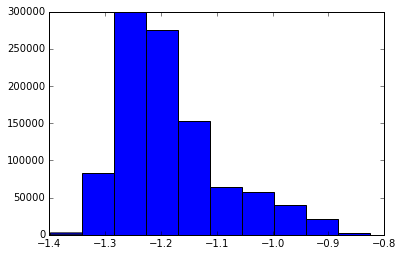

In [46]:
plt.hist(isingAfterCriticalEnergy )

## Ising Specific Heat Capacity

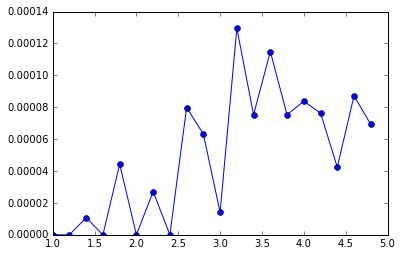

In [35]:
plt.plot(periodicCV[0], periodicCV[1], marker='o')

### Spin models on a small-world network

In this section we take a look at spin systems using the same network energy definitions as above, but this time using an underlying network topology of a small-world network. There are wild fluctuations in the network, and some very interesting dynamics that are seen, without being near a critical point.

In [38]:
smallWorld1Energy = smallWorld1['energy'].map(normalizeNetwork)
smallWorld2Energy = smallWorld2['energy'].map(normalizeNetwork)
smallWorld3Energy = smallWorld3['energy'].map(normalizeNetwork)

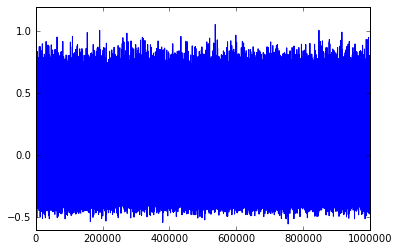

In [39]:
plt.plot(stats.computeLogReturns(smallWorld1Energy[:-1], smallWorld1Energy[1:]))

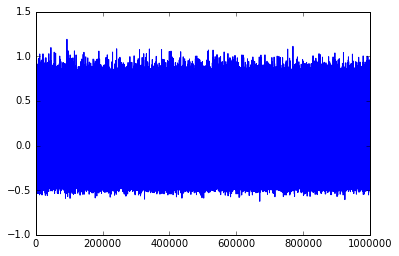

In [40]:
plt.plot(stats.computeLogReturns(smallWorld2Energy[:-1], smallWorld2Energy[1:]))

(array([  1.70000000e+01,   9.10000000e+01,   1.29100000e+03,
          8.83300000e+03,   3.28090000e+04,   8.04150000e+04,
          1.55302000e+05,   2.70751000e+05,   4.28522000e+05,
          2.19690000e+04]),
 array([-1.4678, -1.361 , -1.2542, -1.1474, -1.0406, -0.9338, -0.827 ,
        -0.7202, -0.6134, -0.5066, -0.3998]),
 <a list of 10 Patch objects>)

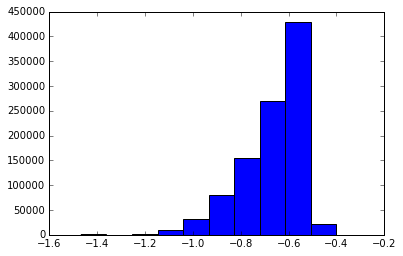

In [42]:
plt.hist(smallWorld1Energy)

(array([  4.10000000e+01,   4.90000000e+02,   3.77000000e+03,
          1.81890000e+04,   4.62560000e+04,   1.05216000e+05,
          1.46323000e+05,   2.39963000e+05,   4.04903000e+05,
          3.48490000e+04]),
 array([-1.5462 , -1.43332, -1.32044, -1.20756, -1.09468, -0.9818 ,
        -0.86892, -0.75604, -0.64316, -0.53028, -0.4174 ]),
 <a list of 10 Patch objects>)

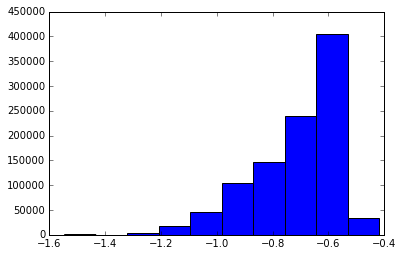

In [43]:
plt.hist(smallWorld2Energy)

(array([  2.16000000e+02,   2.18300000e+03,   1.37020000e+04,
          3.47690000e+04,   8.33470000e+04,   1.38474000e+05,
          8.04830000e+04,   2.83296000e+05,   3.34179000e+05,
          2.93510000e+04]),
 array([-1.7194, -1.5904, -1.4614, -1.3324, -1.2034, -1.0744, -0.9454,
        -0.8164, -0.6874, -0.5584, -0.4294]),
 <a list of 10 Patch objects>)

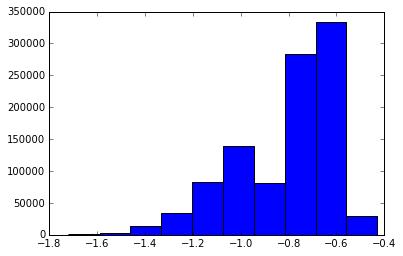

In [44]:
plt.hist(smallWorld3Energy)

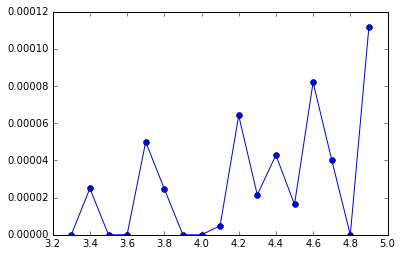

In [45]:
plt.plot(swCV[0], swCV[1], marker='o')